A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting data into subsets based on feature values, creating a tree-like structure. Each internal node represents a decision based on a feature, and each leaf node represents a class label or a predicted value. The tree is built by recursively selecting the feature that best splits the data, typically using metrics like Gini impurity or entropy (for classification) or mean squared error (for regression). Decision trees are easy to interpret and visualize but can be prone to overfitting

In [1]:
import pandas as pd
df = pd.read_csv('Data/salaries.csv')
df.head(2)


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0


In [4]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target = df['salary_more_then_100k']

In [6]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [9]:
inputs.head(5)

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [28]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis = 'columns')
inputs_n.head(3)
train_ds = pd.concat([inputs_n, target], axis=1)
print(train_ds.columns)
print(train_ds['salary_more_then_100k'])

Index(['company_n', 'job_n', 'degree_n', 'salary_more_then_100k'], dtype='object')
0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
X = train_ds.drop('salary_more_then_100k', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, train_ds['salary_more_then_100k'],test_size = 0.2)

In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
model.score(X_test, y_test)

0.75

In [42]:
y_predicted = model.predict(X_test)


[[0 1]
 [0 3]]


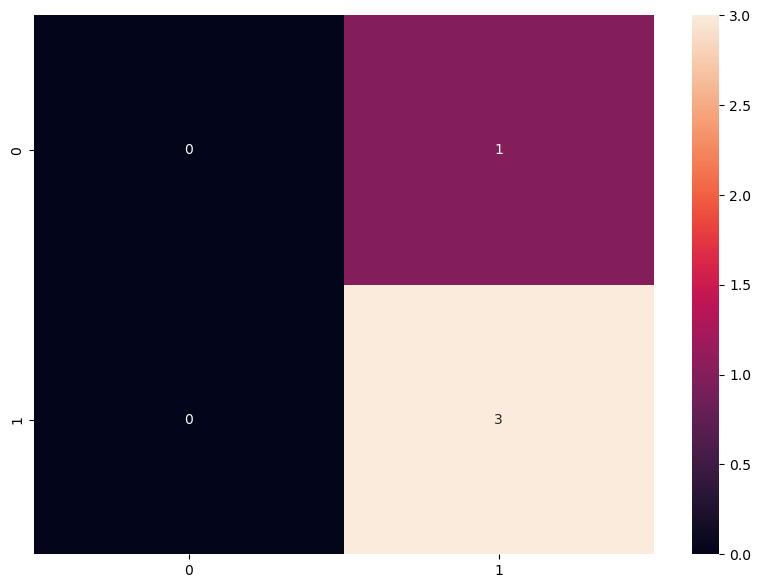

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_predicted, y_test)
print(cm)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel = "predicted"
plt.ylabel = 'Truth'